In [ ]:
!nvidia-smi

Mon Jan 19 03:14:55 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
print("✅ YOLO installed")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ YOLO installed


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4OjRe9ndqjn4fwa1xkG5")
project = rf.workspace("bbsam").project("weed-detection-ekr8i-fdevf")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to weed-detection-1 in yolov8:: 100%|██████████| 5460/5460 [00:01<00:00, 5016.72it/s]


In [ ]:
!pip install -q roboflow ultralytics
print("✅ Installed roboflow + ultralytics")


✅ Installed roboflow + ultralytics


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4OjRe9ndqjn4fwa1xkG5")
project = rf.workspace("bbsam").project("weed-detection-ekr8i-fdevf")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
print("Dataset location:", dataset.location)
!ls -la {dataset.location}
!cat {dataset.location}/data.yaml


Dataset location: /content/weed-detection-1
total 32
drwxr-xr-x 5 root root 4096 Jan 19 03:44 .
drwxr-xr-x 1 root root 4096 Jan 19 03:44 ..
-rw-r--r-- 1 root root  273 Jan 19 03:44 data.yaml
-rw-r--r-- 1 root root  149 Jan 19 03:44 README.dataset.txt
-rw-r--r-- 1 root root  903 Jan 19 03:44 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Jan 19 03:44 test
drwxr-xr-x 4 root root 4096 Jan 19 03:44 train
drwxr-xr-x 4 root root 4096 Jan 19 03:44 valid
names:
- crop
- weed
nc: 2
roboflow:
  license: CC BY 4.0
  project: weed-detection-ekr8i-fdevf
  url: https://universe.roboflow.com/bbsam/weed-detection-ekr8i-fdevf/dataset/1
  version: 1
  workspace: bbsam
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # fast + good starter model

model.train(
    data="/content/weed-detection-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)


Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/weed-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

In [ ]:
metrics = model.val(data="/content/weed-detection-1/data.yaml")
print(metrics)


NameError: name 'model' is not defined

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")  # load trained model
metrics = model.val(data="/content/weed-detection-1/data.yaml")
print(metrics)


!pip install -q ultralytics
print("✅ ultralytics installed")



ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
!pip install -q ultralytics
print("✅ ultralytics installed")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.9 MB/s eta 0:00:00
✅ ultralytics installed


In [ ]:
import ultralytics
print("Ultralytics version:", ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics version: 8.4.6


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
metrics = model.val(data="/content/weed-detection-1/data.yaml")
print(metrics)


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'

In [ ]:
!ls -R runs | head -n 50


ls: cannot access 'runs': No such file or directory


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # small + fast model

model.train(
    data="/content/weed-detection-1/data.yaml",
    epochs=30,      # start with 30 (fast + enough for demo)
    imgsz=640,
    batch=16
)


Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/weed-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

RuntimeError: Dataset '/content/weed-detection-1/data.yaml' error ❌ '/content/weed-detection-1/data.yaml' does not exist

In [ ]:
!ls /content


runs  sample_data  yolov8n.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)


NameError: name 'dataset' is not defined

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4OjRe9ndqjn4fwa1xkG5")
project = rf.workspace("bbsam").project("weed-detection-ekr8i-fdevf")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 135.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to weed-detection-1 in yolov8:: 100%|██████████| 5460/5460 [00:01<00:00, 5092.01it/s]


In [ ]:
print("✅ dataset.location =", dataset.location)
!ls -la {dataset.location}


NameError: name 'dataset' is not defined

In [ ]:
!ls /content


runs  sample_data  weed-detection-1  yolov8n.pt


In [ ]:
!pip install -q ultralytics

from ultralytics import YOLO

DATASET_DIR = "/content/weed-detection-1"

model = YOLO("yolov8n.pt")
model.train(
    data=f"{DATASET_DIR}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)


Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/weed-detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

RuntimeError: Dataset '/content/weed-detection-1/data.yaml' error ❌ '/content/weed-detection-1/data.yaml' does not exist

In [ ]:
import os
os.listdir("/content")


['.config', 'yolov8n.pt', 'weeds3.mp4', 'runs', 'drive', 'sample_data']

In [ ]:
!find /content -name "best.pt"


find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/11PM58QU87zobZgwVJN1iSJaz6cYQV-b9/22-23 E11 Class Folder’: No such file or directory
find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/1a9LapGDBbPqCqbS871y033KctRFLoEr9/Ghassemi Tari, Barsam_CW 12’: No such file or directory
find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/1Z9HlHjvOAlJO8iRLFQ2_dSQzy-MzuAkO/AP Physics 1’: No such file or directory
find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/1y0FyzYJumtu9zUNjra726jWi_RUu_VNu/Phyiscs 11’: No such file or directory
find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/1B5SenJdNBn-FtvSOKO8viWLRJ9nDje5O/Ghassemi Tari, Barsam_E12’: No such file or directory
find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/1I1KI6mTdAnjgg0UpB3M6lsdzqbcJcv6N/Ghassemi Tari, Barsam_Eng. 11’: No such file or directory
find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/1Ke2aFnQHCq-e3qmNb4AtuLQjZoeW95uV/23-24 E12 Class Folder’: No such file or directory
find: ‘/conte

In [ ]:
!find /content -name "best.pt" 2>/dev/null


In [ ]:
!ls -R /content/runs | head -n 200


/content/runs:
detect

/content/runs/detect:
train

/content/runs/detect/train:
args.yaml
weights

/content/runs/detect/train/weights:


In [ ]:
!ls -lh /content/runs/detect/train/weights


total 0


In [ ]:
!ls runs/detect/train/weights


In [ ]:
from ultralytics import YOLO

best_model = YOLO("runs/detect/train/weights/best.pt")

best_model.predict(
    source="/content/weed-detection-1/valid/images",
    conf=0.25,
    save=True
)


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'

In [ ]:
!ls -la runs


total 12
drwxr-xr-x 3 root root 4096 Jan 19 04:30 .
drwxr-xr-x 1 root root 4096 Jan 19 04:38 ..
drwxr-xr-x 4 root root 4096 Jan 19 04:38 detect


In [ ]:
!ls -la runs/detect


total 16
drwxr-xr-x 4 root root 4096 Jan 19 04:38 .
drwxr-xr-x 3 root root 4096 Jan 19 04:30 ..
drwxr-xr-x 3 root root 4096 Jan 19 04:30 train
drwxr-xr-x 3 root root 4096 Jan 19 05:21 train2


In [ ]:
!ls -la runs/detect/train2/weights


total 12200
drwxr-xr-x 2 root root    4096 Jan 19 04:39 .
drwxr-xr-x 3 root root    4096 Jan 19 05:21 ..
-rw-r--r-- 1 root root 6241386 Jan 19 05:21 best.pt
-rw-r--r-- 1 root root 6241386 Jan 19 05:21 last.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

model.predict(
    source="/content/weed-detection-1/valid/images",
    conf=0.25,
    save=True
)


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train2/weights/best.pt'

In [ ]:
!ls -la runs/detect


ls: cannot access 'runs/detect': No such file or directory


In [ ]:
!ls -la runs/detect/predict | head


ls: cannot access 'runs/detect/predict': No such file or directory


In [ ]:
import glob
from PIL import Image
from IPython.display import display

imgs = glob.glob("runs/detect/predict/*.jpg")[:5]
for p in imgs:
    display(Image.open(p))


In [ ]:
metrics = model.val(data="/content/weed-detection-1/data.yaml")
print(metrics)



Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1952.0±813.3 MB/s, size: 93.7 KB)
val: Scanning /content/weed-detection-1/valid/labels.cache... 267 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 267/267 70.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 17/17 3.6it/s 4.8s
                   all        267       1502      0.675       0.66      0.695      0.357
                  crop         32        118      0.652      0.585      0.668       0.34
                  weed        254       1384      0.698      0.735      0.723      0.373
Speed: 2.0ms preprocess, 4.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.me

In [ ]:
from google.colab import files
files.download("runs/detect/train2/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

model.predict(
    source="/content/weed-detection-1/valid/images",
    conf=0.25,
    save=True
)




image 1/267 /content/weed-detection-1/valid/images/12120_jpg.rf.db5815001b4ebcc39aea313ffa522e44.jpg: 384x640 4 weeds, 8.3ms
image 2/267 /content/weed-detection-1/valid/images/12171_jpg.rf.debfdcc77586d8e5096d6a76bedb76cf.jpg: 384x640 1 weed, 6.0ms
image 3/267 /content/weed-detection-1/valid/images/12201_jpg.rf.00fed10b6c220a32c3b3c955c2c7739c.jpg: 384x640 2 weeds, 5.9ms
image 4/267 /content/weed-detection-1/valid/images/12203_jpg.rf.c141b0f338628e4f0668b1b3fdf0ee2f.jpg: 384x640 1 weed, 5.9ms
image 5/267 /content/weed-detection-1/valid/images/12240_jpg.rf.5a2f2a52e4a53143c8be05b9e341a6a8.jpg: 384x640 3 weeds, 6.0ms
image 6/267 /content/weed-detection-1/valid/images/231_jpg.rf.736dcf920c6747679d84c1ae96a13ee5.jpg: 384x640 1 weed, 6.0ms
image 7/267 /content/weed-detection-1/valid/images/236_jpg.rf.f31275ef8b8b3be7818fe510fe6e6991.jpg: 384x640 1 weed, 5.8ms
image 8/267 /content/weed-detection-1/valid/images/257_jpg.rf.01e747704fb500eab4ab999e37c6fbff.jpg: 384x640 5 weeds, 9.6ms
image 9/2

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'crop', 1: 'weed'}
 obb: None
 orig_img: array([[[118, 136, 123],
         [119, 137, 124],
         [119, 137, 124],
         ...,
         [ 95, 112, 101],
         [ 96, 114, 101],
         [ 97, 115, 102]],
 
        [[117, 135, 122],
         [118, 136, 123],
         [119, 137, 124],
         ...,
         [ 97, 114, 103],
         [ 95, 112, 101],
         [ 92, 112,  99]],
 
        [[115, 133, 120],
         [117, 135, 122],
         [119, 137, 124],
         ...,
         [ 95, 115, 103],
         [ 91, 111,  99],
         [ 87, 109,  97]],
 
        ...,
 
        [[ 55,  77,  82],
         [ 54,  76,  81],
         [ 56,  79,  81],
         ...,
         [ 90, 105, 107],
         [ 87, 102, 105],
         [ 85, 100, 102]],
 
        [[ 56,  78,  83],
         [ 55,  77,  82],
         [ 55,  78,  80],
         ...,
         

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

model.predict(
    source="demo.mp4",
    conf=0.25,
    save=True
)


FileNotFoundError: demo.mp4 does not exist

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

model.predict(
    source="/demo.mp4",
    conf=0.25,
    save=True
)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/444) /demo.mp4: 640x384 (no detections), 12.3ms
video 1/1 (frame 2/444) /demo.mp4: 640x384 (no detections), 8.3ms
video 1/1 (frame 3/444) /demo.mp4: 640x384 (no detections), 8.9ms
video 1/1 (frame 4/444) /demo.mp4: 640x384 (no detections), 7.7ms
video 1/1 (frame 5/444) /demo.mp4: 640x384 (no detections), 8.5ms
video 1/1 (frame 6/444) /demo.mp4: 640x384 (no detections), 7.6ms
video 1/1 (frame 7/444) /demo.mp4: 640x384 (no detections), 9

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'crop', 1: 'weed'}
 obb: None
 orig_img: array([[[147, 111,  93],
         [147, 111,  93],
         [147, 111,  93],
         ...,
         [117,  89,  49],
         [119,  91,  51],
         [119,  91,  51]],
 
        [[147, 111,  93],
         [147, 111,  93],
         [147, 111,  93],
         ...,
         [117,  89,  49],
         [119,  91,  51],
         [119,  91,  51]],
 
        [[148, 112,  94],
         [148, 112,  94],
         [148, 112,  94],
         ...,
         [118,  90,  50],
         [119,  91,  51],
         [119,  91,  51]],
 
        ...,
 
        [[118,  96,  93],
         [118,  96,  93],
         [118,  96,  93],
         ...,
         [147, 102,  92],
         [150, 105,  95],
         [153, 108,  98]],
 
        [[118,  96,  93],
         [118,  96,  93],
         [118,  96,  93],
         ...,
         

In [ ]:
!ls runs/detect


predict  predict2  predict3  train  train2  val


In [ ]:
!ls runs/detect/predict*


runs/detect/predict:
12120_jpg.rf.db5815001b4ebcc39aea313ffa522e44.jpg
12171_jpg.rf.debfdcc77586d8e5096d6a76bedb76cf.jpg
12201_jpg.rf.00fed10b6c220a32c3b3c955c2c7739c.jpg
12203_jpg.rf.c141b0f338628e4f0668b1b3fdf0ee2f.jpg
12240_jpg.rf.5a2f2a52e4a53143c8be05b9e341a6a8.jpg
231_jpg.rf.736dcf920c6747679d84c1ae96a13ee5.jpg
236_jpg.rf.f31275ef8b8b3be7818fe510fe6e6991.jpg
257_jpg.rf.01e747704fb500eab4ab999e37c6fbff.jpg
304_jpg.rf.d367845279a22c7a96da58eeb1a2d513.jpg
320_jpg.rf.8b3974ef48b50243ec1f0f9e6742937e.jpg
320_jpg.rf.c0af0709ff848332c6fa4a075c5756c1.jpg
32168_jpg.rf.ca53b6c5ab7de54cbdc72b4c08c3d255.jpg
32170_jpg.rf.6a944b097fdf2a80818dea5a57e5b11a.jpg
32172_jpg.rf.5a01122356e682be89ac4847202504cb.jpg
32182_jpg.rf.797530b66dc83a00de1e51eb87b5a3cd.jpg
32183_jpg.rf.b04d64b5851bafe558d4a7af369ec9de.jpg
32187_jpg.rf.90e47d2ef48522031cf31d851c5d370d.jpg
32195_jpg.rf.237ad1ff52a27ec7f870d8f556d54780.jpg
32196_jpg.rf.eadfd021eac6c84f48b5ad9f0b34f8ad.jpg
32197_jpg.rf.1047dcbddac9bbcf499228b278b7

In [ ]:
from google.colab import files
files.download("runs/detect/predict2/demo.mp4")


FileNotFoundError: Cannot find file: runs/detect/predict2/demo.mp4

In [ ]:
from google.colab import files
files.download("runs/detect/predict3/demo.avi")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ffmpeg -y -i runs/detect/predict3/demo.avi runs/detect/predict3/demo_output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from google.colab import files
files.download("runs/detect/predict3/demo_output.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

model.predict(
    source="/demo.mp4",
    conf=0.05,     # LOWER confidence
    iou=0.5,
    save=True
)




WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/444) /demo.mp4: 640x384 2 weeds, 8.4ms
video 1/1 (frame 2/444) /demo.mp4: 640x384 1 weed, 6.2ms
video 1/1 (frame 3/444) /demo.mp4: 640x384 1 weed, 6.2ms
video 1/1 (frame 4/444) /demo.mp4: 640x384 1 weed, 6.1ms
video 1/1 (frame 5/444) /demo.mp4: 640x384 2 weeds, 5.9ms
video 1/1 (frame 6/444) /demo.mp4: 640x384 2 weeds, 5.8ms
video 1/1 (frame 7/444) /demo.mp4: 640x384 1 weed, 5.5ms
video 1/1 (frame 8/444) /demo.mp4: 640x384 2 weeds, 5.6m

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'crop', 1: 'weed'}
 obb: None
 orig_img: array([[[147, 111,  93],
         [147, 111,  93],
         [147, 111,  93],
         ...,
         [117,  89,  49],
         [119,  91,  51],
         [119,  91,  51]],
 
        [[147, 111,  93],
         [147, 111,  93],
         [147, 111,  93],
         ...,
         [117,  89,  49],
         [119,  91,  51],
         [119,  91,  51]],
 
        [[148, 112,  94],
         [148, 112,  94],
         [148, 112,  94],
         ...,
         [118,  90,  50],
         [119,  91,  51],
         [119,  91,  51]],
 
        ...,
 
        [[118,  96,  93],
         [118,  96,  93],
         [118,  96,  93],
         ...,
         [147, 102,  92],
         [150, 105,  95],
         [153, 108,  98]],
 
        [[118,  96,  93],
         [118,  96,  93],
         [118,  96,  93],
         ...,
         

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

model.predict(
    source="/weeds3.mp4",
    conf=0.05,     # LOWER confidence
    iou=0.5,
    save=True
)

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
from google.colab import files
files.download("runs/detect/predict/video.mp4")


FileNotFoundError: Cannot find file: runs/detect/predict/video.mp4

In [ ]:
!ls runs/detect


predict  predict2  predict3  predict4  train  train2  val


In [ ]:
!ls runs/detect/predict*


runs/detect/predict:
12120_jpg.rf.db5815001b4ebcc39aea313ffa522e44.jpg
12171_jpg.rf.debfdcc77586d8e5096d6a76bedb76cf.jpg
12201_jpg.rf.00fed10b6c220a32c3b3c955c2c7739c.jpg
12203_jpg.rf.c141b0f338628e4f0668b1b3fdf0ee2f.jpg
12240_jpg.rf.5a2f2a52e4a53143c8be05b9e341a6a8.jpg
231_jpg.rf.736dcf920c6747679d84c1ae96a13ee5.jpg
236_jpg.rf.f31275ef8b8b3be7818fe510fe6e6991.jpg
257_jpg.rf.01e747704fb500eab4ab999e37c6fbff.jpg
304_jpg.rf.d367845279a22c7a96da58eeb1a2d513.jpg
320_jpg.rf.8b3974ef48b50243ec1f0f9e6742937e.jpg
320_jpg.rf.c0af0709ff848332c6fa4a075c5756c1.jpg
32168_jpg.rf.ca53b6c5ab7de54cbdc72b4c08c3d255.jpg
32170_jpg.rf.6a944b097fdf2a80818dea5a57e5b11a.jpg
32172_jpg.rf.5a01122356e682be89ac4847202504cb.jpg
32182_jpg.rf.797530b66dc83a00de1e51eb87b5a3cd.jpg
32183_jpg.rf.b04d64b5851bafe558d4a7af369ec9de.jpg
32187_jpg.rf.90e47d2ef48522031cf31d851c5d370d.jpg
32195_jpg.rf.237ad1ff52a27ec7f870d8f556d54780.jpg
32196_jpg.rf.eadfd021eac6c84f48b5ad9f0b34f8ad.jpg
32197_jpg.rf.1047dcbddac9bbcf499228b278b7

In [ ]:
from google.colab import files
files.download("runs/detect/predict/video.mp4")


FileNotFoundError: Cannot find file: runs/detect/predict/video.mp4

In [ ]:
from google.colab import files
files.upload()


Saving weeds.jpg to weeds.jpg


{'weeds.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x04\x05\x04\x04\x06\x05\x05\x05\x06\x06\x06\x07\t\x0e\t\t\x08\x08\t\x12\r\r\n\x0e\x15\x12\x16\x16\x15\x12\x14\x14\x17\x1a!\x1c\x17\x18\x1f\x19\x14\x14\x1d\'\x1d\x1f"#%%%\x16\x1c),($+!$%$\xff\xdb\x00C\x01\x06\x06\x06\t\x08\t\x11\t\t\x11$\x18\x14\x18$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\xff\xc2\x00\x11\x08\x01\x80\x02@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x05\x06\x02\x01\x00\x07\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xcaqk\x93(\xc5\xe0\xa5\xf5\xe3\x04\x1a\xde\x83\xe9\x8a+zJ\xd1\xdd7\xe7\x0e&\xc7\xc4Y\x9cP\xef\x90"\xed\xf0\x02!D\x15\xd0\x11\x00\x0b:\xc2%\x19\x8e\xd8\xa7\xd7\x16B\t\xbd4\x1b\x12fc\x1e\x0b\xd4\xf9\xd3c\xdd\x97\xfa\x94\xcf\xceC\x9d\xfe\xad\xe

In [ ]:
!ls


runs  sample_data  weed-detection-1  weeds.jpg	yolo26n.pt  yolov8n.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

results = model.predict(
    source="/weeds/test.jpg",  # change name if different
    conf=0.05,   # low so it shows weak detections too
    imgsz=640,
    save=True
)

print("✅ Saved to:", results[0].save_dir)


FileNotFoundError: /weeds/test.jpg does not exist

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")   # your trained model

results = model.predict(
    source="/content/weeds.jpg",
    conf=0.05,
    imgsz=640,
    save=True
)

print("✅ Saved to:", results[0].save_dir)




image 1/1 /content/weeds.jpg: 448x640 1 crop, 1 weed, 44.1ms
Speed: 2.9ms preprocess, 44.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict5
✅ Saved to: /content/runs/detect/predict5


Found: ['runs/detect/predict5/weeds.jpg']


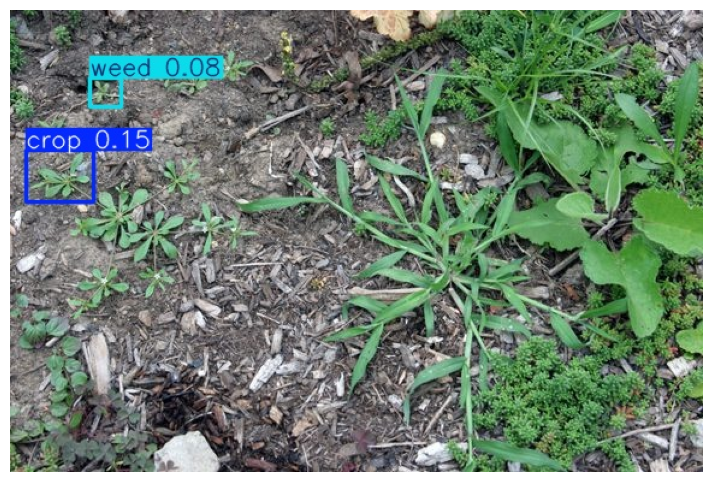

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

pred_files = glob.glob("runs/detect/predict*/weeds.jpg")
print("Found:", pred_files)

img = Image.open(pred_files[-1])
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")   # your trained model

results = model.predict(
    source="/content/weeds.jpg",
    conf=0.01,
    imgsz=640,
    save=True
)

print("✅ Saved to:", results[0].save_dir)


image 1/1 /content/weeds.jpg: 448x640 3 crops, 5 weeds, 8.0ms
Speed: 2.9ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict6
✅ Saved to: /content/runs/detect/predict6


Found: ['runs/detect/predict5/weeds.jpg', 'runs/detect/predict6/weeds.jpg']


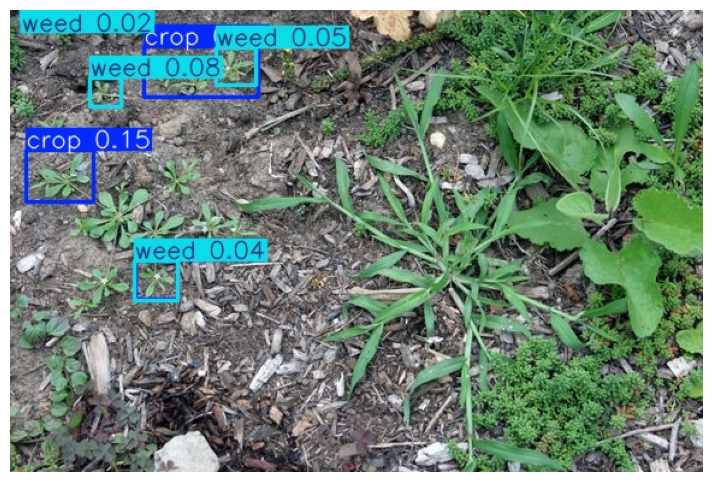

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

pred_files = glob.glob("runs/detect/predict*/weeds.jpg")
print("Found:", pred_files)

img = Image.open(pred_files[-1])
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
files.upload()


Saving weeds2.jpg to weeds2.jpg


{'weeds2.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x1b\x12\x14\x17\x14\x11\x1b\x17\x16\x17\x1e\x1c\x1b (B+(%%(Q:=0B`Ued_U][jx\x99\x81jq\x90s[]\x85\xb5\x86\x90\x9e\xa3\xab\xad\xabg\x80\xbc\xc9\xba\xa6\xc7\x99\xa8\xab\xa4\xff\xdb\x00C\x01\x1c\x1e\x1e(#(N++N\xa4n]n\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xff\xc2\x00\x11\x08\x04\t\x05\xdc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x19\x00\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\xff\xc4\x00\x17\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01Ht\xce\x12w\x9c\xa9E\xb0\xb5T\xb2\xca&gf\x08]N\xbbA<\xfdD\xf9\x1a\x84\xaf;\x01\xb2\x14\x05j\x91\xa1\x0e*L\x95\x14\xbe\t@_)\xb3.`l\x82\x0c\x92\xdb\x03\x

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")   # your trained model

results = model.predict(
    source="/content/weeds2.jpg",
    conf=0.05,
    imgsz=640,
    save=True
)

print("✅ Saved to:", results[0].save_dir)


image 1/1 /content/weeds2.jpg: 448x640 (no detections), 7.1ms
Speed: 2.5ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict7
✅ Saved to: /content/runs/detect/predict7


Found: ['runs/detect/predict7/weeds2.jpg']


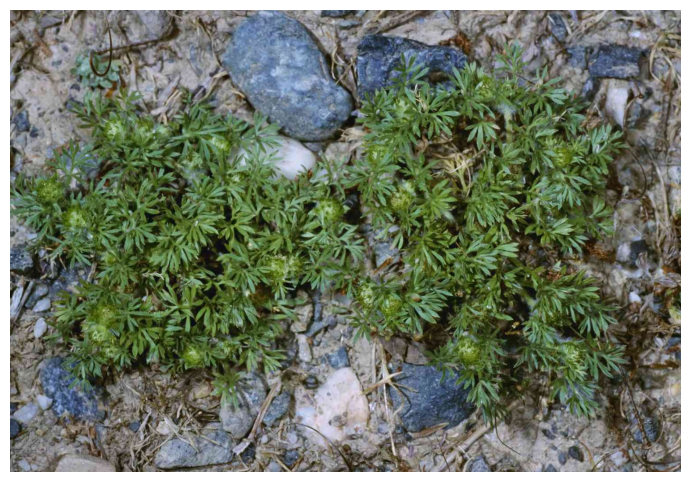

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

pred_files = glob.glob("runs/detect/predict*/weeds2.jpg")
print("Found:", pred_files)

img = Image.open(pred_files[-1])
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

metrics = model.val(data="/content/weed-detection-1/data.yaml")
print(metrics)


Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2268.7±477.8 MB/s, size: 94.9 KB)
val: Scanning /content/weed-detection-1/valid/labels.cache... 267 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 267/267 80.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 17/17 4.2it/s 4.0s
                   all        267       1502      0.675       0.66      0.695      0.357
                  crop         32        118      0.652      0.585      0.668       0.34
                  weed        254       1384      0.698      0.735      0.723      0.373
Speed: 1.3ms preprocess, 3.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box

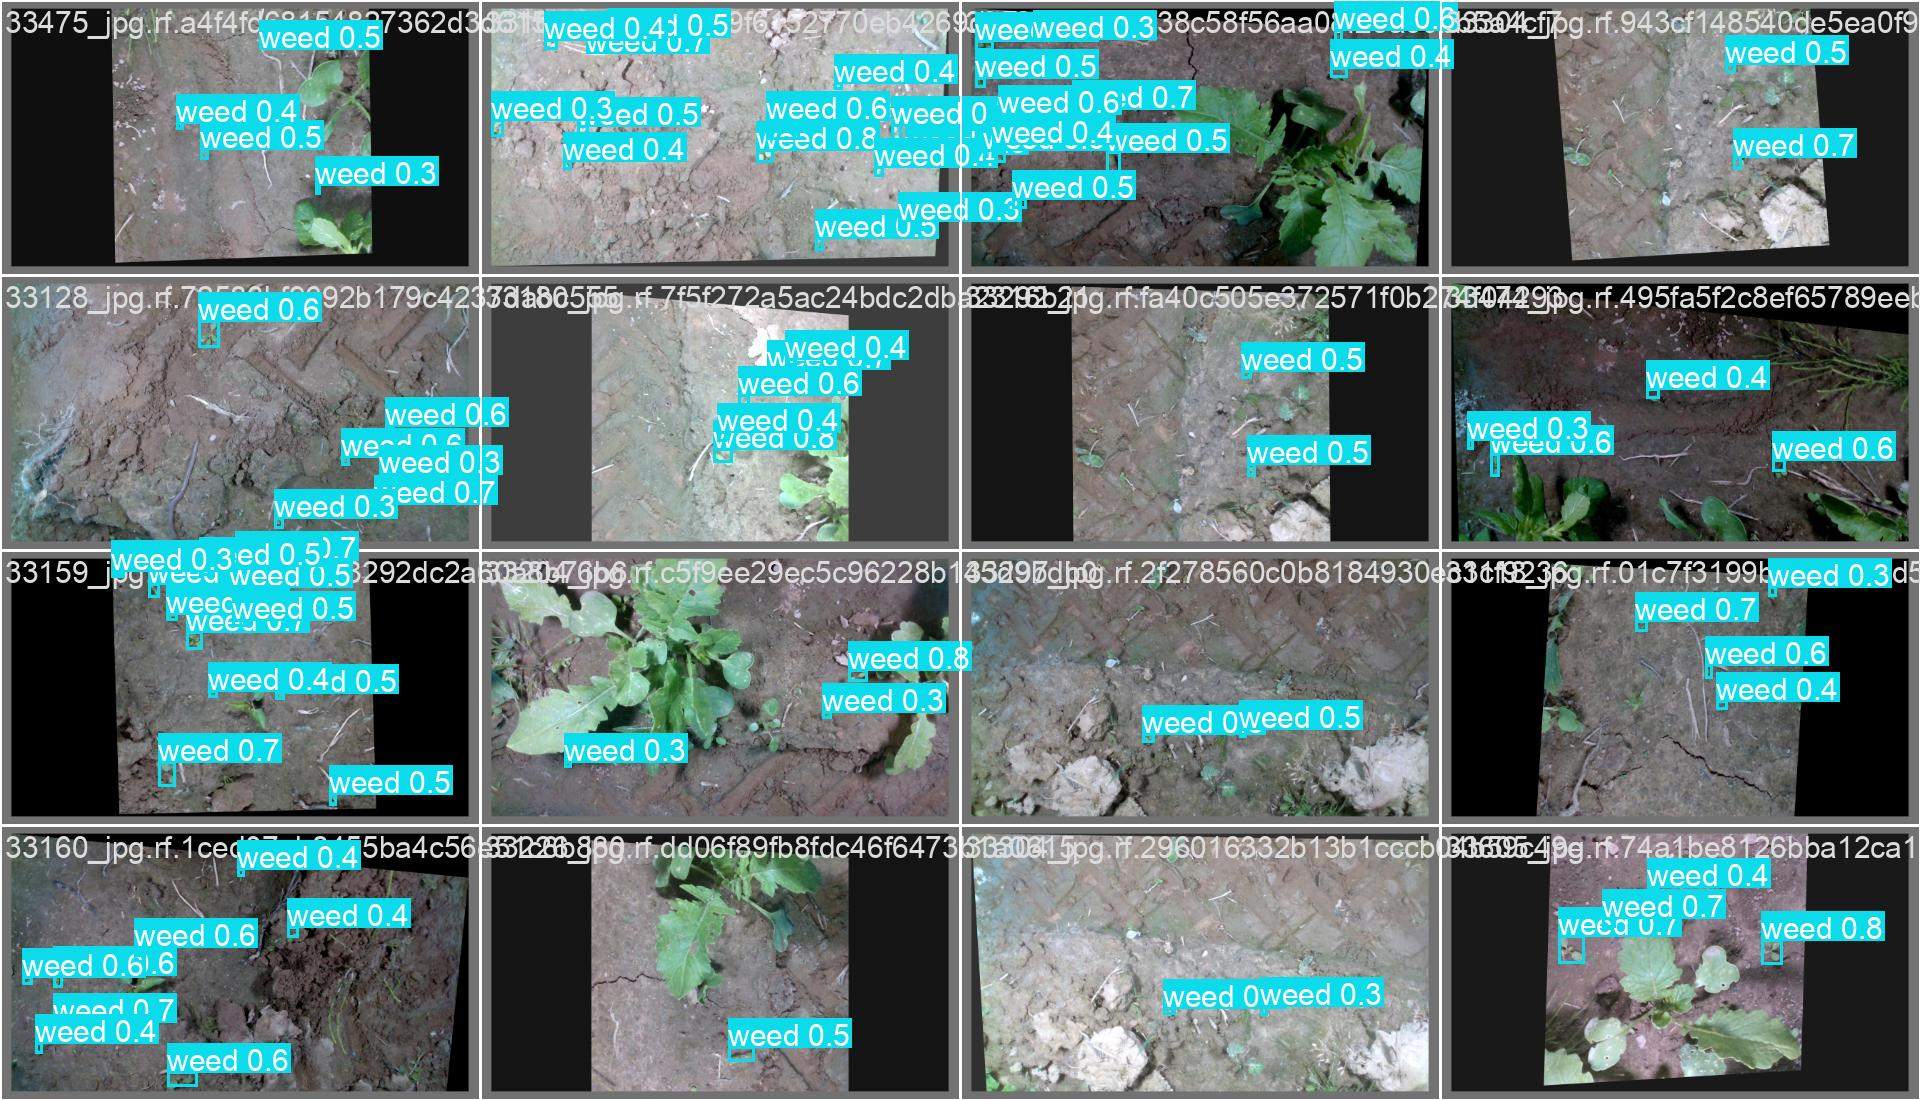

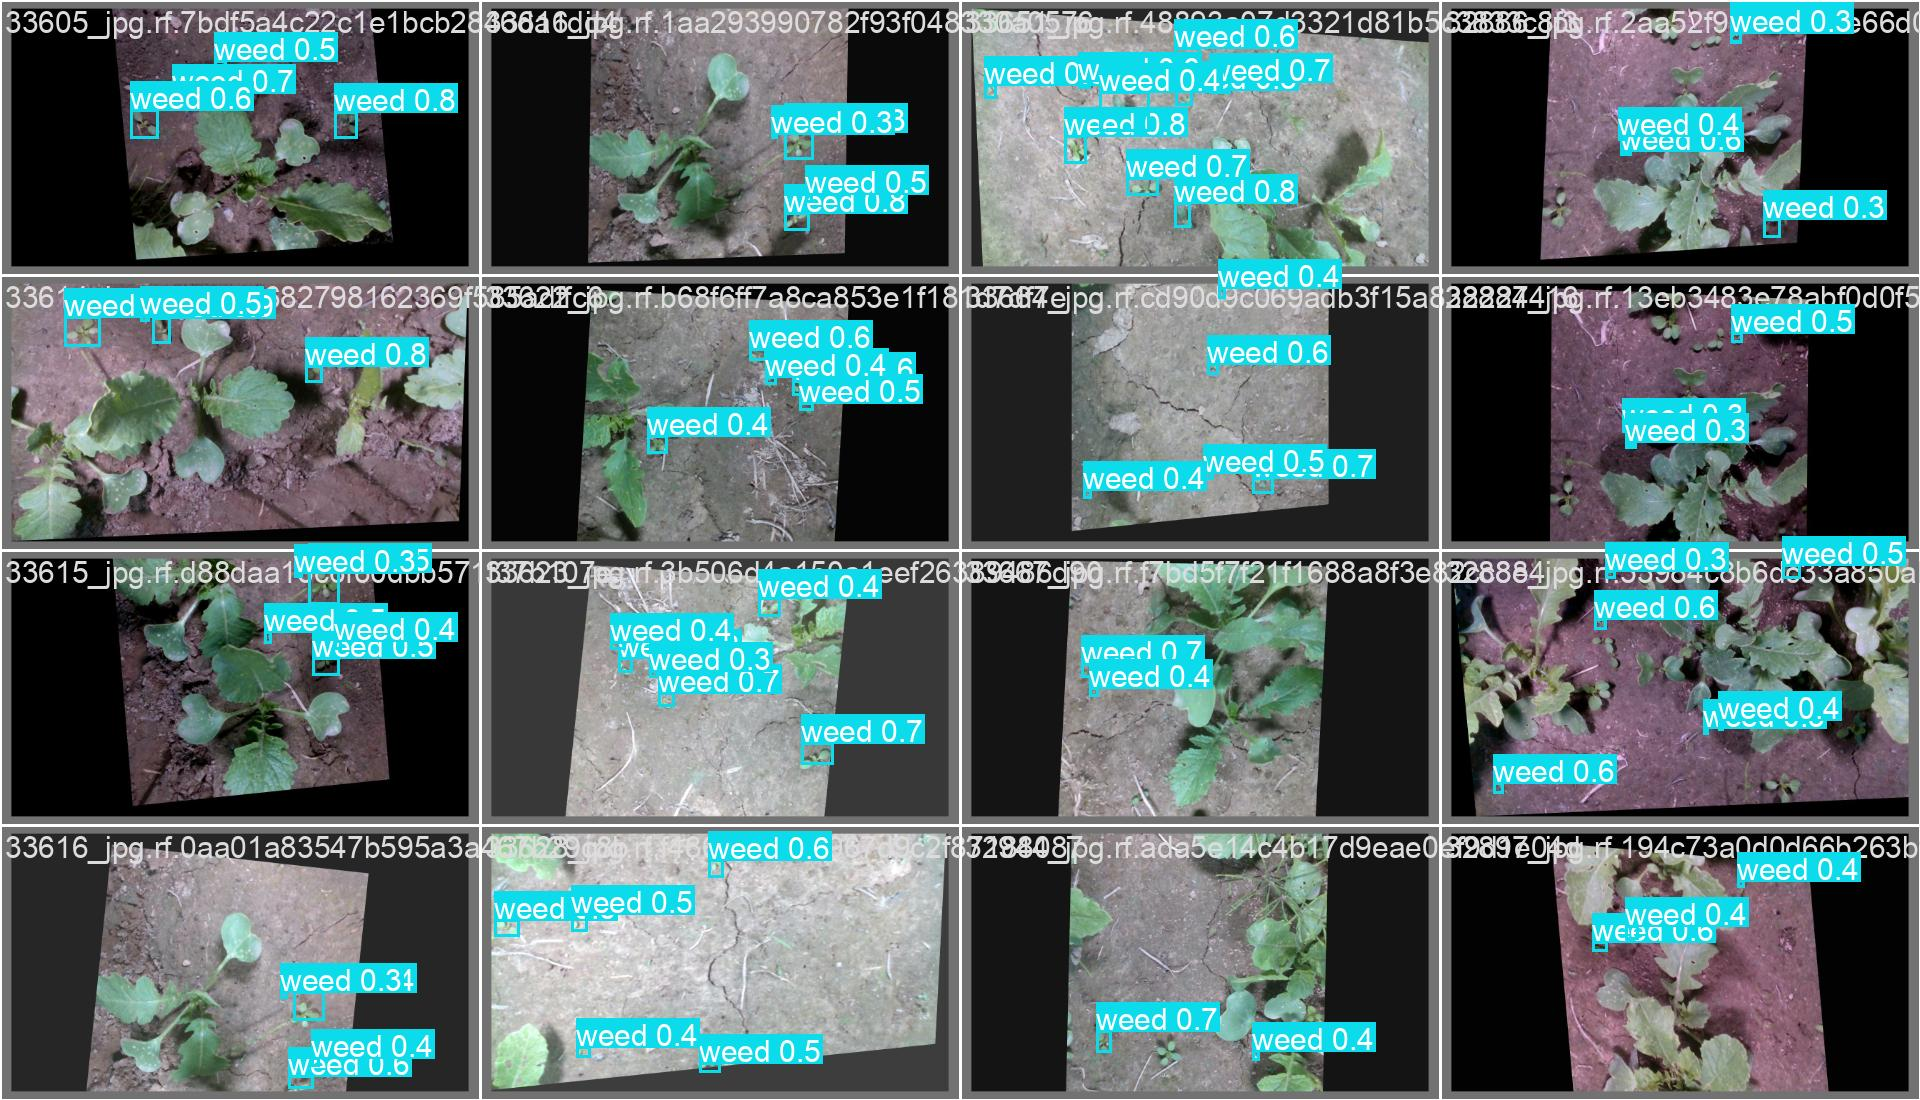

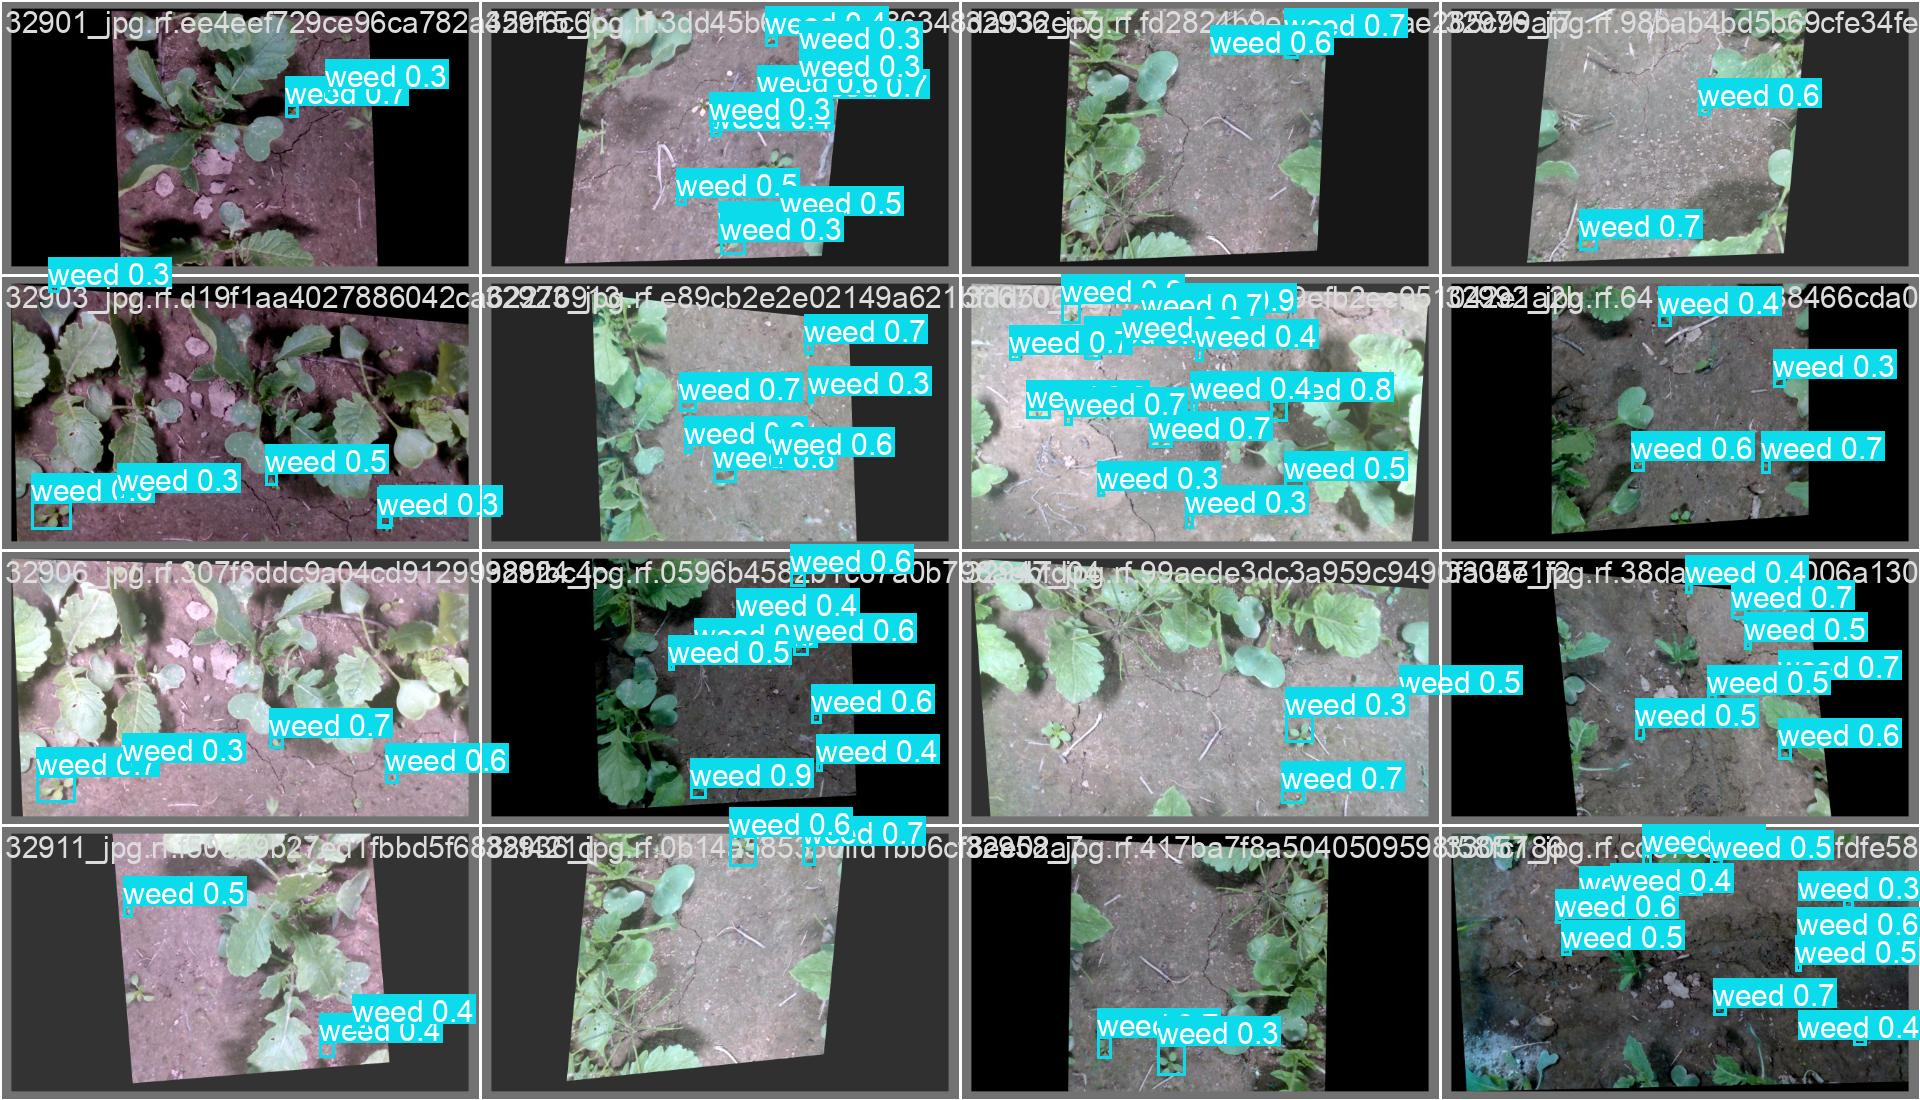

In [ ]:
from IPython.display import Image, display
display(Image("/content/runs/detect/val2/val_batch0_pred.jpg"))
display(Image("/content/runs/detect/val2/val_batch1_pred.jpg"))
display(Image("/content/runs/detect/val2/val_batch2_pred.jpg"))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r runs/detect/train /content/drive/MyDrive/


MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r runs/detect/train /content/drive/MyDrive/


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving weeds3.mp4 to weeds3.mp4


In [ ]:
import os
os.listdir()


['.config', 'weeds3.mp4', 'sample_data']

In [ ]:
video_path = "weeds3.mp4"


In [ ]:
import cv2

cap = cv2.VideoCapture(video_path)
print("Opened:", cap.isOpened())

frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print("Frames:", frames)
print("FPS:", fps)
print("Resolution:", width, "x", height)

cap.release()


Opened: True
Frames: 395
FPS: 29.984817813765183
Resolution: 480 x 848


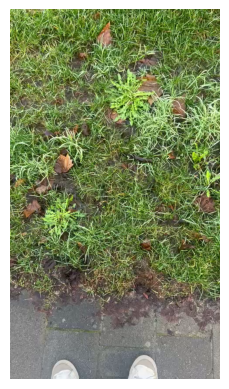

In [ ]:
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis("off")
plt.show()


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

results = model.predict(
    source="weeds3.mp4",   # ✅ your video name
    conf=0.25,
    imgsz=640,
    save=True
)

print("Saved to:", results[0].save_dir)


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

results = model.predict(
    source="weeds5.mp4",   # ✅ your video name
    conf=0.25,
    imgsz=640,
    save=True
)

print("Saved to:", results[0].save_dir)


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

results = model.predict(
    source="weeds5.MOV",
    conf=0.25,
    imgsz=640,
    save=True
)

print("Saved to:", results[0].save_dir)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train2/weights/best.pt'

In [ ]:
!find /content -name "best.pt"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!find /content -name "best.pt"

In [ ]:
!find /content/drive -name "best.pt"


In [ ]:
!ls -R /content/runs 2>/dev/null | head -n 60


In [ ]:
!find /content -name "*.pt" 2>/dev/null


/content/yolov8n.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/yolov8n.pt")

results = model.predict(
    source="/weeds5.MOV",  # your video name
    conf=0.25,
    imgsz=640,
    save=True
)

print("Saved to:", results[0].save_dir)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/395) /weeds5.MOV: 640x384 1 bird, 2 toilets, 494.7ms
video 1/1 (frame 2/395) /weeds5.MOV: 640x384 2 toilets, 152.4ms
video 1/1 (frame 3/395) /weeds5.MOV: 640x384 2 toilets, 158.5ms
video 1/1 (frame 4/395) /weeds5.MOV: 640x384 2 toilets, 164.5ms
video 1/1 (frame 5/395) /weeds5.MOV: 640x384 2 toilets, 155.2ms
video 1/1 (frame 6/395) /weeds5.MOV: 640x384 2 toilets, 197.5ms
video 1/1 (frame 7/395) /weeds5.MOV: 640x384 2 toilets, 158.1ms
vi

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!find /content/drive -name "best.pt" 2>/dev/null


In [ ]:
!nividia-smi

/bin/bash: line 1: nividia-smi: command not found


In [ ]:
!nvidia-smi


Mon Jan 19 18:41:26 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
!ls /content


sample_data


In [ ]:
print("Dataset folder:", dataset.location)
!ls -la {dataset.location}


NameError: name 'dataset' is not defined

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4OjRe9ndqjn4fwa1xkG5")
project = rf.workspace("bbsam").project("weed-detection-ekr8i-fdevf")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to weed-detection-1 in yolov8:: 100%|██████████| 5460/5460 [00:00<00:00, 6163.81it/s]


In [ ]:
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4OjRe9ndqjn4fwa1xkG5E")

project = rf.workspace("bbsam").project("weed-detection-ekr8i-fdevf")
version = project.version(1)
dataset = version.download("yolov8")


RuntimeError: {
    "error": {
        "message": "This API key does not exist (or has been revoked).",
        "status": 401,
        "type": "OAuthException",
        "hint": "You may retrieve your API key via the Roboflow Dashboard. Go to Account > Roboflow Keys to retrieve yours.",
        "key": "4OjRe9ndqjn4fwa1xkG5E"
    }
}

In [ ]:
!pip install -q ultralytics roboflow

from ultralytics import YOLO
from roboflow import Roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 81.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="NwoNrXGbI01SXOLg0SUp")

project = rf.workspace("bbsam").project("weed-detection-ha0nz-qzb3g")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weed-Detection-1 in yolov8:: 100%|██████████| 708/708 [00:00<00:00, 1293.47it/s]


In [ ]:
import os

print("Dataset folder:", dataset.location)
print("Files inside:", os.listdir(dataset.location))
print("data.yaml exists?", os.path.exists(dataset.location + "/data.yaml"))


Dataset folder: /content/Weed-Detection-1
Files inside: ['train', 'README.dataset.txt', 'valid', 'test', 'data.yaml', 'README.roboflow.txt']
data.yaml exists? True


In [ ]:
model = YOLO("yolov8n.pt")

results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)


NameError: name 'YOLO' is not defined

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")

results = model.predict(
    source="/content/weeds5.MOV",
    conf=0.15,
    save=True
)

print("Saved to:", results[0].save_dir)


NameError: name 'YOLO' is not defined

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
!ls -la runs/detect/train/weights


total 12240
drwxr-xr-x 2 root root    4096 Jan 19 19:22 .
drwxr-xr-x 3 root root    4096 Jan 19 19:25 ..
-rw-r--r-- 1 root root 6260010 Jan 19 19:25 best.pt
-rw-r--r-- 1 root root 6260010 Jan 19 19:25 last.pt


In [ ]:
!cp runs/detect/train/weights/best.pt "/content/drive/MyDrive/best_weed_model.pt"


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/best_weed_model.pt")


In [ ]:
results = model.predict(
    source="/content/weeds5.MOV",
    conf=0.15,
    save=True
)

print("Saved to:", results[0].save_dir)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/395) /content/weeds5.MOV: 640x384 1 weed1, 8.1ms
video 1/1 (frame 2/395) /content/weeds5.MOV: 640x384 1 weed1, 7.4ms
video 1/1 (frame 3/395) /content/weeds5.MOV: 640x384 1 weed1, 7.6ms
video 1/1 (frame 4/395) /content/weeds5.MOV: 640x384 1 weed1, 8.2ms
video 1/1 (frame 5/395) /content/weeds5.MOV: 640x384 1 weed1, 10.6ms
video 1/1 (frame 6/395) /content/weeds5.MOV: 640x384 1 weed1, 7.8ms
video 1/1 (frame 7/395) /content/weeds5.MOV: 640x

In [ ]:
print(results[0].save_dir)


/content/runs/detect/predict2


In [ ]:
!ls -lh weeds5.avi


ls: cannot access 'weeds5.avi': No such file or directory


In [ ]:
!apt-get update -qq
!apt-get install -y ffmpeg -qq

!ffmpeg -y -i weeds5.avi -vcodec libx264 -pix_fmt yuv420p -movflags faststart weeds5_result.mp4


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshi

In [ ]:
!ffmpeg -y -i "/content/runs/detect/predict/weeds5.avi" -vcodec libx264 -pix_fmt yuv420p -movflags faststart "/content/runs/detect/predict/weeds5_result.mp4"



ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import Video
Video("weeds5_result.mp4", embed=True)


In [ ]:
!ls -lh /content/runs/detect/predict


total 16M
-rw-r--r-- 1 root root  15M Jan 19 19:27 weeds5.avi
-rw-r--r-- 1 root root 971K Jan 19 19:35 weeds5_result.mp4


In [ ]:
!ffprobe -v error -show_entries format=duration -of default=nw=1:nk=1 weeds5.avi


weeds5.avi: No such file or directory


In [ ]:
!ffprobe -v error -show_entries format=duration -of default=nw=1:nk=1 weeds5.MOV


13.168345


In [ ]:
!ls -lh weeds5.MOV


-rw-r--r-- 1 root root 12M Jan 19 19:27 weeds5.MOV


In [ ]:
!ls -lh /content/drive/MyDrive | head -n 50


ls: '/content/drive/MyDrive/AP Physics 1': No such file or directory
ls: '/content/drive/MyDrive/Phyiscs 11': No such file or directory
ls: '/content/drive/MyDrive/Ghassemi Tari, Barsam_CW 12': No such file or directory
ls: '/content/drive/MyDrive/22-23 E11 Class Folder': No such file or directory
ls: '/content/drive/MyDrive/Ghassemi Tari, Barsam_Eng. 11': No such file or directory
ls: '/content/drive/MyDrive/23-24 E12 Class Folder': No such file or directory
ls: '/content/drive/MyDrive/Ghassemi Tari, Barsam_E12': No such file or directory
total 72M
-rw------- 1 root root  179 Aug 22  2023 00000-FRM-A-RISK ASSESSMENT.gdoc
-rw------- 1 root root  179 Dec  8  2022 05a) Suspense.gdoc
-rw------- 1 root root 175K May  2  2024 2024 June exam schedule 240501.pdf
lrw------- 1 root root    0 Nov 10  2022 22-23 E11 Class Folder -> /content/drive/.shortcut-targets-by-id/11PM58QU87zobZgwVJN1iSJaz6cYQV-b9/22-23 E11 Class Folder
-rw------- 1 root root  179 Feb  6  2024 2.2 PROJECT Paper Doll .gdoc
l

In [ ]:
!cp "/content/drive/MyDrive/weeds_full.MOV" /content/


In [ ]:
!ls -lh /content/weeds_full.MOV
!ffprobe -v error -show_entries format=duration -of default=nw=1:nk=1 /content/weeds_full.MOV


-rw------- 1 root root 11M Jan 19 20:10 /content/weeds_full.MOV
13.168345


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")  # or your correct path

model.predict(
    source="/content/weeds_full.MOV",
    conf=0.25,
    imgsz=640,
    save=True
)


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
!find /content -name "best.pt" 2>/dev/null


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!find /content/drive -name "best.pt" 2>/dev/null


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!find /content/drive/MyDrive -name "best.pt" 2>/dev/null


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.7 MB/s eta 0:00:00


In [8]:
!pip install -q ultralytics


In [9]:
import ultralytics
print(ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.4.6


In [15]:
from ultralytics import YOLO

model = YOLO("best_weed_model.pt")   # your trained model

results = model.predict(
    source="weeds_full.MOV",   # your video name (change if different)
    conf=0.07,
    imgsz=640,
    save=True
)

print("Saved to:", results[0].save_dir)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/395) /content/weeds_full.MOV: 640x384 3 weed1s, 9.6ms
video 1/1 (frame 2/395) /content/weeds_full.MOV: 640x384 2 weed1s, 10.5ms
video 1/1 (frame 3/395) /content/weeds_full.MOV: 640x384 1 weed1, 1 weed3, 8.0ms
video 1/1 (frame 4/395) /content/weeds_full.MOV: 640x384 2 weed1s, 1 weed3, 7.7ms
video 1/1 (frame 5/395) /content/weeds_full.MOV: 640x384 1 weed1, 7.4ms
video 1/1 (frame 6/395) /content/weeds_full.MOV: 640x384 1 weed1, 7.2ms
vide

In [16]:
!ffmpeg -i weeds_full.avi -vcodec libx264 -acodec aac -movflags +faststart demo_output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [13]:
!ffmpeg -i weeds_full.avi -vcodec libx264 -acodec aac -movflags +faststart demo_output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [14]:
!ffmpeg -i /content/runs/detect/predict2/weeds_full.avi -vcodec libx264 -acodec aac -movflags +faststart demo_output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [19]:
!ffmpeg -y -i "/content/runs/detect/predict3/weeds_full.avi" -vcodec libx264 -acodec aac -movflags +faststart "weeds_final.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [18]:
from google.colab import files
files.download("final.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>